In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 에콰도르 전국 데이터

In [ ]:
df = pd.read_csv('data/merged_data.csv')
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6


In [ ]:
df.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dcoilwtico         994
city                22
state               16
type                 5
cluster             17
dtype: int64

In [ ]:
# 타입, 클러스터별 전체 기간 매출 합계
type_cluster_sales = df.groupby(['type', 'cluster'])['sales'].sum()
type_cluster_sales

type  cluster
A     5          6.208755e+07
      11         1.006143e+08
      14         1.574305e+08
      17         3.291149e+07
B     6          1.142544e+08
      10         1.774687e+07
      16         1.325938e+07
C     3          7.562870e+07
      7          1.547812e+07
      12         1.803097e+07
      15         5.529695e+07
D     1          5.437675e+07
      2          2.891640e+07
      4          4.944344e+07
      8          1.079282e+08
      9          3.056108e+07
      10         7.755122e+06
      13         7.210225e+07
E     10         5.982244e+07
Name: sales, dtype: float64

In [ ]:
# 특이한 점 발견 : 10번 클러스터가 타입 C, D, E에 속해있다?

In [ ]:
# 26, 28, 31번 매장은 각각 타입이 다른데 모두 클러스터 10번
df[df['cluster']==10].drop_duplicates('type')

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
594,594,2013-01-01,26,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,D,10
660,660,2013-01-01,28,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,E,10
792,792,2013-01-01,31,AUTOMOTIVE,0.0,0,NaN,Babahoyo,Los Rios,B,10


In [ ]:
# 같은 매장 번호면서 다른 클러스터 혹은 타입에 속한 경우는 없는 것으로 확인
type_cluster_store_sales = df.groupby(['type', 'cluster', 'store_nbr'])['sales'].sum()
type_cluster_store_sales

type  cluster  store_nbr
A     5        44           6.208755e+07
      11       45           5.449801e+07
               49           4.342010e+07
               52           2.696170e+06
      14       46           4.189606e+07
               47           5.094831e+07
               48           3.593313e+07
               50           2.865302e+07
      17       51           3.291149e+07
B     6        9            2.640944e+07
               11           2.832556e+07
               20           1.292095e+07
               21           9.255506e+06
               34           1.709073e+07
               39           2.025219e+07
      10       31           1.774687e+07
      16       18           1.325938e+07
C     3        16           1.098641e+07
               30           7.382074e+06
               32           5.951796e+06
               33           1.417850e+07
               35           7.676679e+06
               40           1.839576e+07
               54           1.10

In [ ]:
type_cluster_mean_sales = type_cluster_store_sales.groupby(['type', 'cluster']).mean()
type_cluster_mean_sales

type  cluster
A     5          6.208755e+07
      11         3.353809e+07
      14         3.935763e+07
      17         3.291149e+07
B     6          1.904240e+07
      10         1.774687e+07
      16         1.325938e+07
C     3          1.080410e+07
      7          7.739060e+06
      12         1.803097e+07
      15         1.105939e+07
D     1          1.812558e+07
      2          1.445820e+07
      4          1.648115e+07
      8          3.597608e+07
      9          1.528054e+07
      10         7.755122e+06
      13         1.802556e+07
E     10         1.495561e+07
Name: sales, dtype: float64

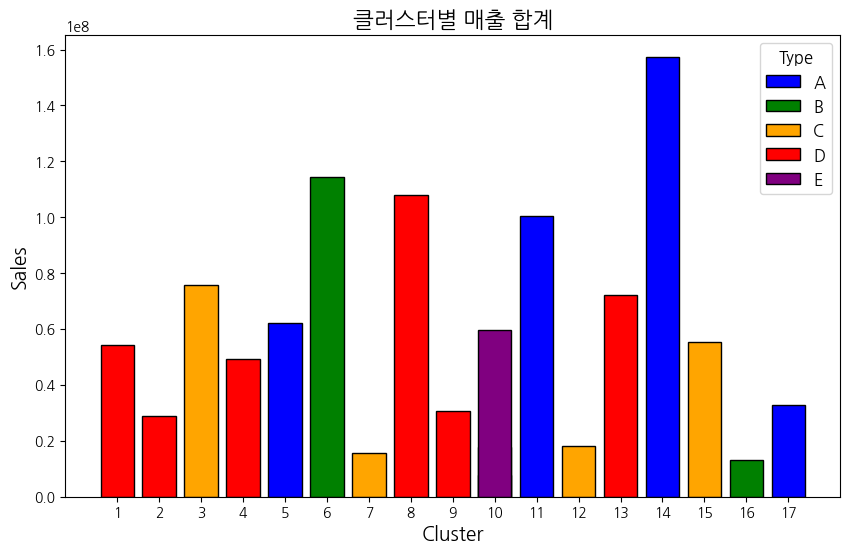

In [ ]:
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(10,6))

# 클러스터 그룹화
grouped = type_cluster_sales.groupby(level=0)

# 각 클러스터별로 막대 그래프 그리기
for i, (name, group) in enumerate(grouped):
    ax.bar(group.index.get_level_values(1), group.values, color=colors[i%len(colors)], label=name, ec='black')

ax.set_title('클러스터별 매출 합계', fontsize=16)
plt.xticks(np.arange(1, 18), np.arange(1, 18))
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.legend(title='Type', fontsize=12, title_fontsize=12)

plt.show()

In [ ]:
# 타입별 전체 기간 매출 합계
type_store_sales = df.groupby(['type', 'store_nbr'])['sales'].sum()
type_store_sales

type  store_nbr
A     44           6.208755e+07
      45           5.449801e+07
      46           4.189606e+07
      47           5.094831e+07
      48           3.593313e+07
      49           4.342010e+07
      50           2.865302e+07
      51           3.291149e+07
      52           2.696170e+06
B     9            2.640944e+07
      11           2.832556e+07
      18           1.325938e+07
      20           1.292095e+07
      21           9.255506e+06
      31           1.774687e+07
      34           1.709073e+07
      39           2.025219e+07
C     10           9.613906e+06
      12           1.065922e+07
      13           1.052305e+07
      14           1.138792e+07
      15           1.145127e+07
      16           1.098641e+07
      17           1.803097e+07
      19           1.304951e+07
      22           4.090202e+06
      30           7.382074e+06
      32           5.951796e+06
      33           1.417850e+07
      35           7.676679e+06
      40           1.839

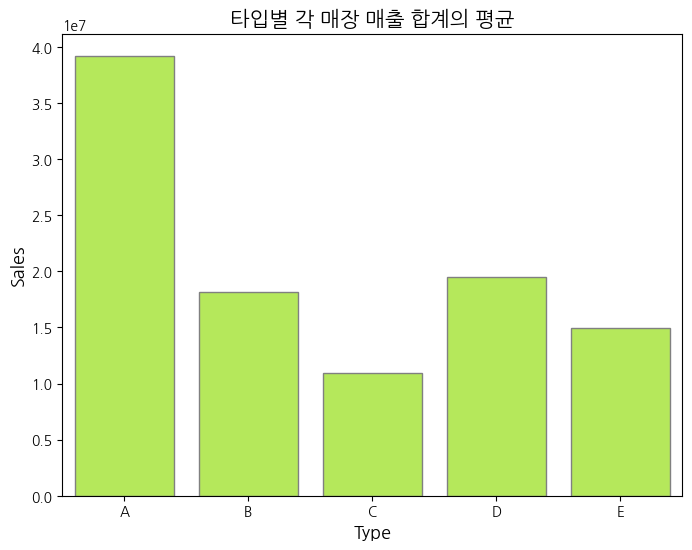

In [ ]:
# 각 타입별로 평균 매출액 계산
mean_sales = type_store_sales.groupby(level=0).mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=mean_sales.index, y=mean_sales.values, ax=ax, color='#BBFF44', ec='grey')

# 그래프 타이틀, 레이블 등 설정
ax.set_title('타입별 각 매장 매출 합계의 평균', fontsize=15)
ax.set_xlabel('Type', fontsize=13)
ax.set_ylabel('Sales', fontsize=13)
ax.tick_params(axis='x', labelrotation=0)

plt.show()

# 범위를 키토로 한정
- 2017년 에콰도르 인구가 약 1662만, 키토 인구는 약 179만으로 1/9이 안 됨
 - https://population.un.org/wpp/publications/files/wpp2017_keyfindings.pdf
 - https://www.macrotrends.net/cities/20910/quito/population
 - https://worldpopulationreview.com/world-cities/quito-population\
- 면적은 전국 283,561km², 키토 372.4km²
- 전국 매장 54개 중 1/3인 18개가 키토에 밀집되어 있음

In [ ]:
df[df['city']=='Guayaquil'].drop_duplicates('store_nbr')

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
528,528,2013-01-01,24,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,D,1
594,594,2013-01-01,26,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,D,10
660,660,2013-01-01,28,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,E,10
693,693,2013-01-01,29,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,E,10
759,759,2013-01-01,30,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,C,3
825,825,2013-01-01,32,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,C,3
891,891,2013-01-01,34,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,B,6
1518,1518,2013-01-01,51,AUTOMOTIVE,0.0,0,NaN,Guayaquil,Guayas,A,17


In [ ]:
nation_quito = pd.DataFrame({'전국':[16620000, 54], '키토':[1790000, 18], '과야킬':[2844000, 8]}, index=['인구', '매장'])
nation_quito

,전국,키토,과야킬
인구,16620000,1790000,2844000
매장,54,18,8


In [ ]:
nation_quito['그 외'] = nation_quito['전국'] - nation_quito['키토'] - nation_quito['과야킬']

In [ ]:
nation_quito

,전국,키토,과야킬,그 외
인구,16620000,1790000,2844000,11986000
매장,54,18,8,28


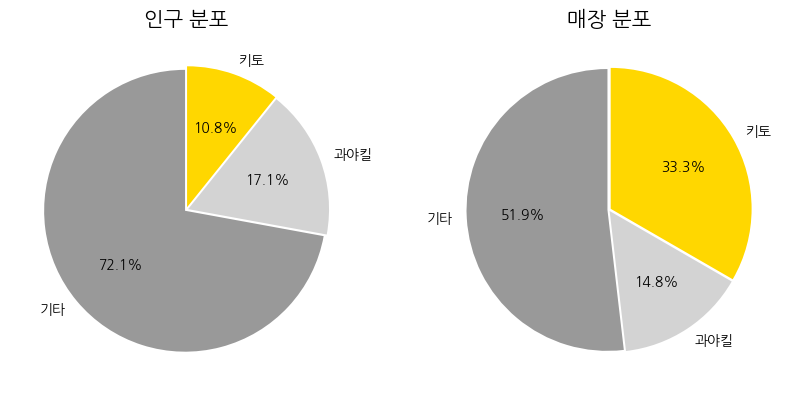

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 인구 파이차트
ax[0].pie(nation_quito.loc['인구', ['그 외', '과야킬', '키토']],
          labels=['기타', '과야킬', '키토'],
          autopct='%1.1f%%',
          explode=[0.01, 0.015, 0.02],
          colors=['#999999', 'lightgrey', 'gold'],
          startangle=90)
ax[0].set_title('인구 분포', fontsize=15)

# 매장 파이차트
ax[1].pie(nation_quito.loc['매장', ['그 외', '과야킬', '키토']],
          labels=['기타', '과야킬', '키토'],
          autopct='%1.1f%%',
          explode=[0.01, 0.01, 0.015],
          colors=['#999999', 'lightgrey', 'gold'],
          startangle=90)
ax[1].set_title('매장 분포', fontsize=15)

plt.show()

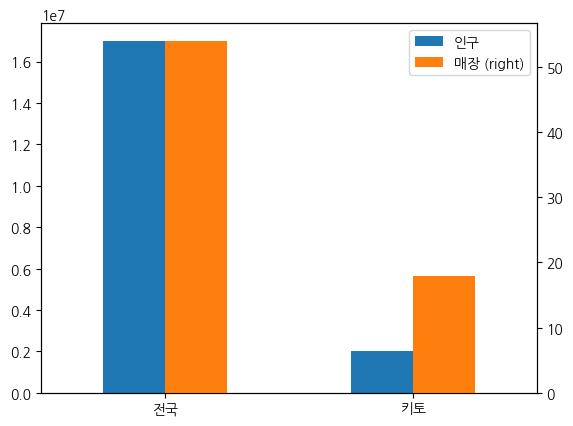

In [ ]:
nation_quito.T.plot(kind='bar', secondary_y='매장', rot=0)
plt.show()

# 키토(Quito) 데이터만 확인
- 키토(Quito)로 한정지었을 때
- 날짜가 변동되거나 제품군이 변경되진 않는다
- 18개 스토어로 추려지고
- E 타입이 빠진 4개 타입
- 총 10개(5, 6, 8, 9, 11, 12, 13, 14, 15, 16) 클러스터만 남는다

In [ ]:
df_quito = df[df['city']=='Quito']
df_quito

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6


In [ ]:
df_quito['yearmonth'] = df_quito['date'].map(lambda x: x[:7])

C:\Users\kseob\AppData\Local\Temp\ipykernel_28800\4255588828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quito['yearmonth'] = df_quito['date'].map(lambda x: x[:7])


In [ ]:
df_quito

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2017-08
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2017-08
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2017-08
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2017-08


In [ ]:
df_quito.nunique()

id             1000296
date              1684
store_nbr           18
family              33
sales           191939
onpromotion        253
dcoilwtico         994
city                 1
state                1
type                 4
cluster             10
yearmonth           56
dtype: int64

In [ ]:
sorted(df_quito['cluster'].unique())

[5, 6, 8, 9, 11, 12, 13, 14, 15, 16]

### A 타입
- 44, 45, 46, 47, 48, 49번 매장
- 5, 11, 14번 클러스터

In [ ]:
quito_A = df_quito[df_quito['type']=='A']
quito_A

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
1254,1254,2013-01-01,44,AUTOMOTIVE,0.000000,0,NaN,Quito,Pichincha,A,5,2013-01
1255,1255,2013-01-01,44,BABY CARE,0.000000,0,NaN,Quito,Pichincha,A,5,2013-01
1256,1256,2013-01-01,44,BEAUTY,0.000000,0,NaN,Quito,Pichincha,A,5,2013-01
1257,1257,2013-01-01,44,BEVERAGES,0.000000,0,NaN,Quito,Pichincha,A,5,2013-01
1258,1258,2013-01-01,44,BOOKS,0.000000,0,NaN,Quito,Pichincha,A,5,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3000553,3000553,2017-08-15,49,POULTRY,926.492000,0,47.57,Quito,Pichincha,A,11,2017-08
3000554,3000554,2017-08-15,49,PREPARED FOODS,207.888000,0,47.57,Quito,Pichincha,A,11,2017-08
3000555,3000555,2017-08-15,49,PRODUCE,6316.367000,10,47.57,Quito,Pichincha,A,11,2017-08
3000556,3000556,2017-08-15,49,SCHOOL AND OFFICE SUPPLIES,192.000000,12,47.57,Quito,Pichincha,A,11,2017-08


In [ ]:
tmpA = quito_A.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1)
tmpA

store_nbr,44,45,46,47,48,49
yearmonth,,,,,,
2013-01,6.763951e+05,5.394207e+05,4.851985e+05,5.328300e+05,393039.644168,2.918911e+05
2013-02,5.955276e+05,5.034798e+05,4.469718e+05,4.779170e+05,369976.821263,2.583201e+05
2013-03,6.973039e+05,6.015846e+05,5.316344e+05,5.788542e+05,447756.715286,3.250036e+05
2013-04,6.669542e+05,5.572005e+05,4.865555e+05,5.248006e+05,413425.020003,3.128943e+05
2013-05,6.726814e+05,5.764108e+05,5.023400e+05,5.376800e+05,421302.961073,3.285801e+05
2013-06,6.663036e+05,5.914544e+05,5.101676e+05,5.493326e+05,436320.137003,3.290144e+05
2013-07,6.375686e+05,5.542560e+05,4.807294e+05,4.937887e+05,401904.368981,3.095823e+05
2013-08,6.541044e+05,5.657099e+05,5.007798e+05,5.074047e+05,417463.436092,3.247055e+05
2013-09,6.857152e+05,5.858765e+05,5.159002e+05,5.717760e+05,445250.058918,3.588367e+05


<AxesSubplot: xlabel='yearmonth'>

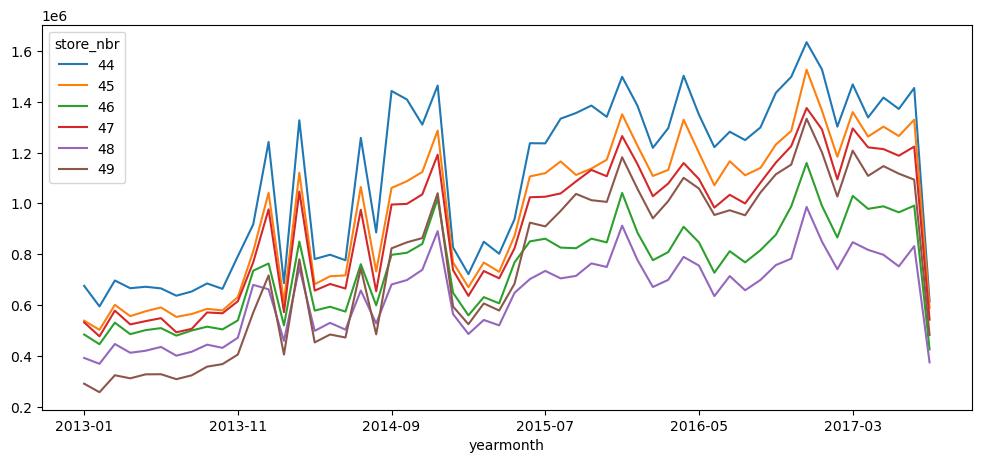

In [ ]:
tmpA.plot(figsize=(12,5))

In [ ]:
# A 타입의 매장
quito_A.nunique()

id             333432
date             1684
store_nbr           6
family             33
sales           84934
onpromotion       252
dcoilwtico        994
city                1
state               1
type                1
cluster             3
yearmonth          56
dtype: int64

In [ ]:
quito_A['store_nbr'].value_counts()

44    55572
45    55572
46    55572
47    55572
48    55572
49    55572
Name: store_nbr, dtype: int64

In [ ]:
quito_A['cluster'].value_counts()

14    166716
11    111144
5      55572
Name: cluster, dtype: int64

### B 타입
- 9, 18, 20번 매장
- 6, 16번 클러스터

In [ ]:
quito_B = df_quito[df_quito['type']=='B']
quito_B

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
297,297,2013-01-01,18,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,B,16,2013-01
298,298,2013-01-01,18,BABY CARE,0.000,0,NaN,Quito,Pichincha,B,16,2013-01
299,299,2013-01-01,18,BEAUTY,0.000,0,NaN,Quito,Pichincha,B,16,2013-01
300,300,2013-01-01,18,BEVERAGES,0.000,0,NaN,Quito,Pichincha,B,16,2013-01
301,301,2013-01-01,18,BOOKS,0.000,0,NaN,Quito,Pichincha,B,16,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2017-08
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2017-08
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2017-08
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2017-08


In [ ]:
tmpB = quito_B.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1)
tmpB

store_nbr,9,18,20
yearmonth,,,
2013-01,275783.088972,143778.991029,0.000000
2013-02,270772.988953,126948.936015,0.000000
2013-03,335130.363029,167107.501965,0.000000
2013-04,331206.982972,164875.700999,0.000000
2013-05,327240.726897,165937.564000,0.000000
2013-06,338969.922998,172704.136980,0.000000
2013-07,322130.303958,153875.275005,0.000000
2013-08,339126.578900,153488.700988,0.000000
2013-09,353910.442004,170850.110000,0.000000


<AxesSubplot: xlabel='yearmonth'>

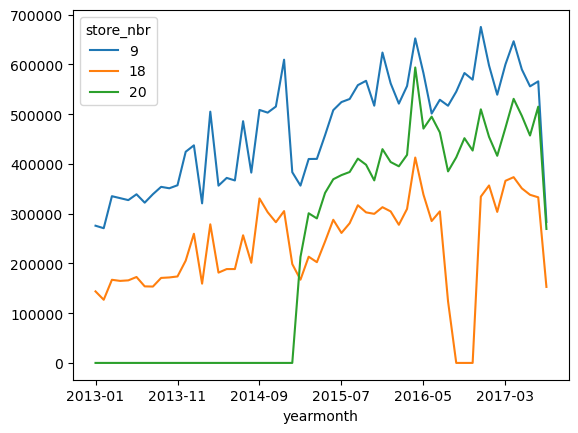

In [ ]:
tmpB.plot()

In [ ]:
# B 타입의 매장
quito_B.nunique()

id             166716
date             1684
store_nbr           3
family             33
sales           29243
onpromotion       164
dcoilwtico        994
city                1
state               1
type                1
cluster             2
yearmonth          56
dtype: int64

In [ ]:
quito_B['store_nbr'].value_counts()

18    55572
20    55572
9     55572
Name: store_nbr, dtype: int64

In [ ]:
quito_B['cluster'].value_counts()

6     111144
16     55572
Name: cluster, dtype: int64

### C 타입
- 10, 17번 매장
- 12, 15번 클러스터

In [ ]:
quito_C = df_quito[df_quito['type']=='C']
quito_C

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
33,33,2013-01-01,10,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
34,34,2013-01-01,10,BABY CARE,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
35,35,2013-01-01,10,BEAUTY,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
36,36,2013-01-01,10,BEVERAGES,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
37,37,2013-01-01,10,BOOKS,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2999398,2999398,2017-08-15,17,POULTRY,314.182,0,47.57,Quito,Pichincha,C,12,2017-08
2999399,2999399,2017-08-15,17,PREPARED FOODS,61.000,0,47.57,Quito,Pichincha,C,12,2017-08
2999400,2999400,2017-08-15,17,PRODUCE,2300.077,122,47.57,Quito,Pichincha,C,12,2017-08
2999401,2999401,2017-08-15,17,SCHOOL AND OFFICE SUPPLIES,57.000,6,47.57,Quito,Pichincha,C,12,2017-08


In [ ]:
tmpC = quito_C.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1)
tmpC

store_nbr,10,17
yearmonth,,
2013-01,115863.234032,170508.715035
2013-02,111732.101048,153013.640049
2013-03,131225.051964,194056.352005
2013-04,138870.275027,189996.844989
2013-05,140865.992056,202840.187970
2013-06,146942.342977,202894.224000
2013-07,135710.581993,193689.755980
2013-08,144899.418010,193849.291000
2013-09,142391.734043,202377.713926


<AxesSubplot: xlabel='yearmonth'>

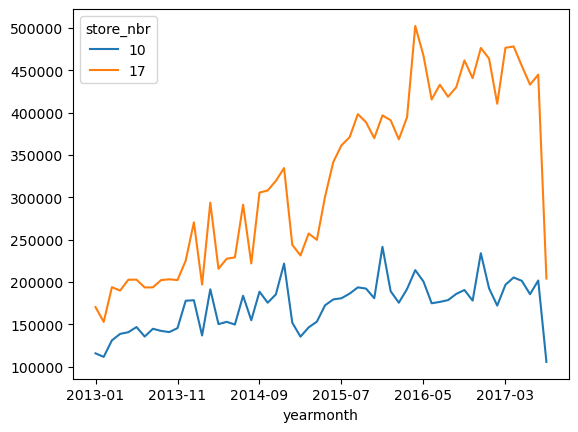

In [ ]:
tmpC.plot()

In [ ]:
# C 타입의 매장
quito_C.nunique()

id             111144
date             1684
store_nbr           2
family             33
sales           13628
onpromotion       137
dcoilwtico        994
city                1
state               1
type                1
cluster             2
yearmonth          56
dtype: int64

In [ ]:
quito_C['store_nbr'].value_counts()

10    55572
17    55572
Name: store_nbr, dtype: int64

In [ ]:
quito_C['cluster'].value_counts()

15    55572
12    55572
Name: cluster, dtype: int64

### D 타입
- 1, 2, 3, 4, 6, 7, 8번 매장
- 8, 9, 13번 클러스터

In [ ]:
quito_D = df_quito[df_quito['type']=='D']
quito_D

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3000850,3000850,2017-08-15,8,POULTRY,548.982,0,47.57,Quito,Pichincha,D,8,2017-08
3000851,3000851,2017-08-15,8,PREPARED FOODS,143.714,0,47.57,Quito,Pichincha,D,8,2017-08
3000852,3000852,2017-08-15,8,PRODUCE,3939.392,10,47.57,Quito,Pichincha,D,8,2017-08
3000853,3000853,2017-08-15,8,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57,Quito,Pichincha,D,8,2017-08


In [ ]:
tmpD = quito_D.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1)
tmpD

store_nbr,1,2,3,4,6,7,8
yearmonth,,,,,,,
2013-01,156864.199004,218534.833002,4.965743e+05,209295.859959,277174.731967,241521.916105,315457.444984
2013-02,129814.332014,195284.587042,4.296186e+05,183875.168026,241863.931978,219496.627989,274554.326952
2013-03,151666.227994,229064.695967,5.316862e+05,222346.659981,296197.406976,265404.151072,330302.085987
2013-04,155848.493959,225228.713980,5.120721e+05,208460.129010,282872.161010,263720.697014,320260.757001
2013-05,154965.652004,228265.450078,5.181973e+05,214306.581983,290725.825965,274149.259992,329159.068040
2013-06,154051.426999,239085.941026,5.443877e+05,219865.072982,299639.558982,275549.411989,331004.811024
2013-07,156757.218014,229389.600022,5.173358e+05,211088.040113,281006.471990,261548.939017,319030.651047
2013-08,149183.312957,234816.993993,5.325380e+05,205759.032001,278802.712975,253879.861984,320112.751975
2013-09,152075.480020,250348.787999,5.530405e+05,216418.160946,301429.098930,277449.155067,331418.577005


<AxesSubplot: xlabel='yearmonth'>

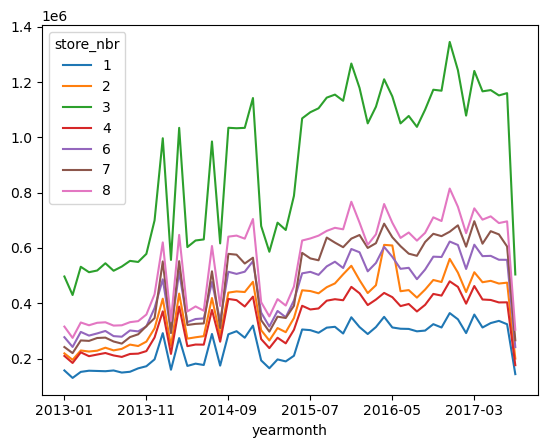

In [ ]:
tmpD.plot()

In [ ]:
# D 타입의 매장
quito_D.nunique()

id             389004
date             1684
store_nbr           7
family             33
sales           87710
onpromotion       243
dcoilwtico        994
city                1
state               1
type                1
cluster             3
dtype: int64

In [ ]:
quito_D['store_nbr'].value_counts()

1    55572
2    55572
3    55572
4    55572
6    55572
7    55572
8    55572
Name: store_nbr, dtype: int64

In [ ]:
quito_D['cluster'].value_counts()

13    166716
8     166716
9      55572
Name: cluster, dtype: int64

In [ ]:
# 연월, 매장별 매출액(모든 제품군 합계)
# 15일까지밖에 없는 2017년 8월 제외
all_store_sales = df_quito.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1).iloc[:-1, :]
all_store_sales

store_nbr,1,2,3,4,6,7,8,9,10,17,18,20,44,45,46,47,48,49
yearmonth,,,,,,,,,,,,,,,,,,
2013-01,156864.199004,218534.833002,4.965743e+05,209295.859959,277174.731967,241521.916105,315457.444984,275783.088972,115863.234032,170508.715035,143778.991029,0.000000,6.763951e+05,5.394207e+05,4.851985e+05,5.328300e+05,393039.644168,2.918911e+05
2013-02,129814.332014,195284.587042,4.296186e+05,183875.168026,241863.931978,219496.627989,274554.326952,270772.988953,111732.101048,153013.640049,126948.936015,0.000000,5.955276e+05,5.034798e+05,4.469718e+05,4.779170e+05,369976.821263,2.583201e+05
2013-03,151666.227994,229064.695967,5.316862e+05,222346.659981,296197.406976,265404.151072,330302.085987,335130.363029,131225.051964,194056.352005,167107.501965,0.000000,6.973039e+05,6.015846e+05,5.316344e+05,5.788542e+05,447756.715286,3.250036e+05
2013-04,155848.493959,225228.713980,5.120721e+05,208460.129010,282872.161010,263720.697014,320260.757001,331206.982972,138870.275027,189996.844989,164875.700999,0.000000,6.669542e+05,5.572005e+05,4.865555e+05,5.248006e+05,413425.020003,3.128943e+05
2013-05,154965.652004,228265.450078,5.181973e+05,214306.581983,290725.825965,274149.259992,329159.068040,327240.726897,140865.992056,202840.187970,165937.564000,0.000000,6.726814e+05,5.764108e+05,5.023400e+05,5.376800e+05,421302.961073,3.285801e+05
2013-06,154051.426999,239085.941026,5.443877e+05,219865.072982,299639.558982,275549.411989,331004.811024,338969.922998,146942.342977,202894.224000,172704.136980,0.000000,6.663036e+05,5.914544e+05,5.101676e+05,5.493326e+05,436320.137003,3.290144e+05
2013-07,156757.218014,229389.600022,5.173358e+05,211088.040113,281006.471990,261548.939017,319030.651047,322130.303958,135710.581993,193689.755980,153875.275005,0.000000,6.375686e+05,5.542560e+05,4.807294e+05,4.937887e+05,401904.368981,3.095823e+05
2013-08,149183.312957,234816.993993,5.325380e+05,205759.032001,278802.712975,253879.861984,320112.751975,339126.578900,144899.418010,193849.291000,153488.700988,0.000000,6.541044e+05,5.657099e+05,5.007798e+05,5.074047e+05,417463.436092,3.247055e+05
2013-09,152075.480020,250348.787999,5.530405e+05,216418.160946,301429.098930,277449.155067,331418.577005,353910.442004,142391.734043,202377.713926,170850.110000,0.000000,6.857152e+05,5.858765e+05,5.159002e+05,5.717760e+05,445250.058918,3.588367e+05


In [ ]:
all_store_sales = df_quito.groupby(['yearmonth', 'store_nbr'])['sales'].sum().unstack(level=1).iloc[:-1, :]
all_store_sales

<AxesSubplot: xlabel='yearmonth'>

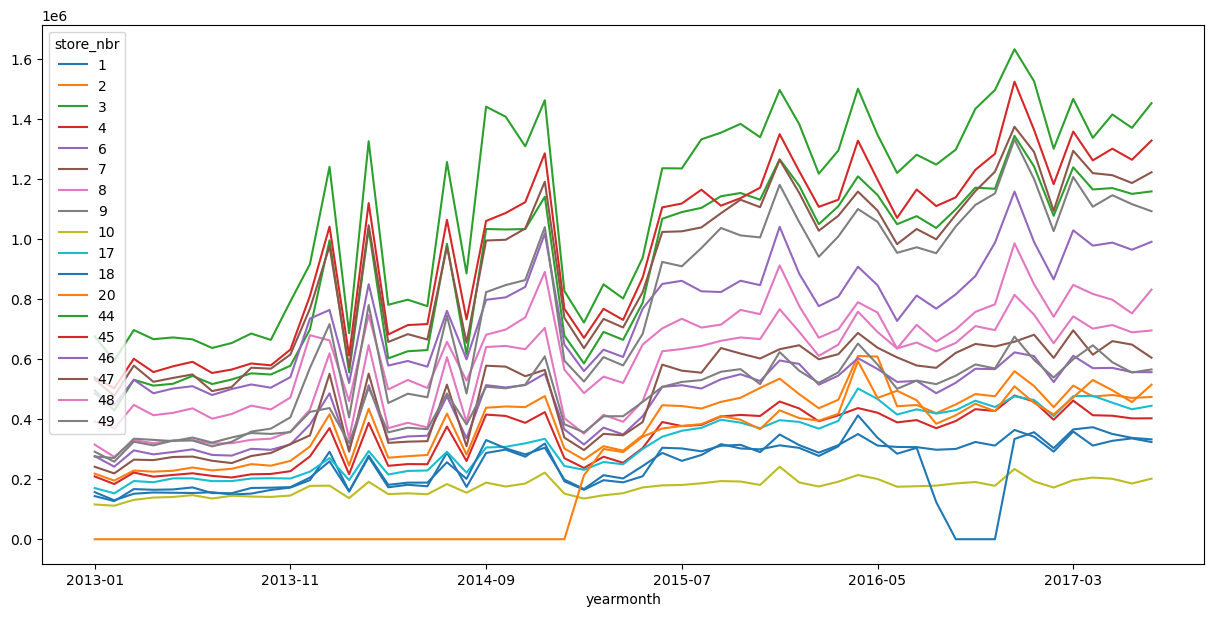

In [ ]:
all_store_sales.plot(figsize=(15,7))

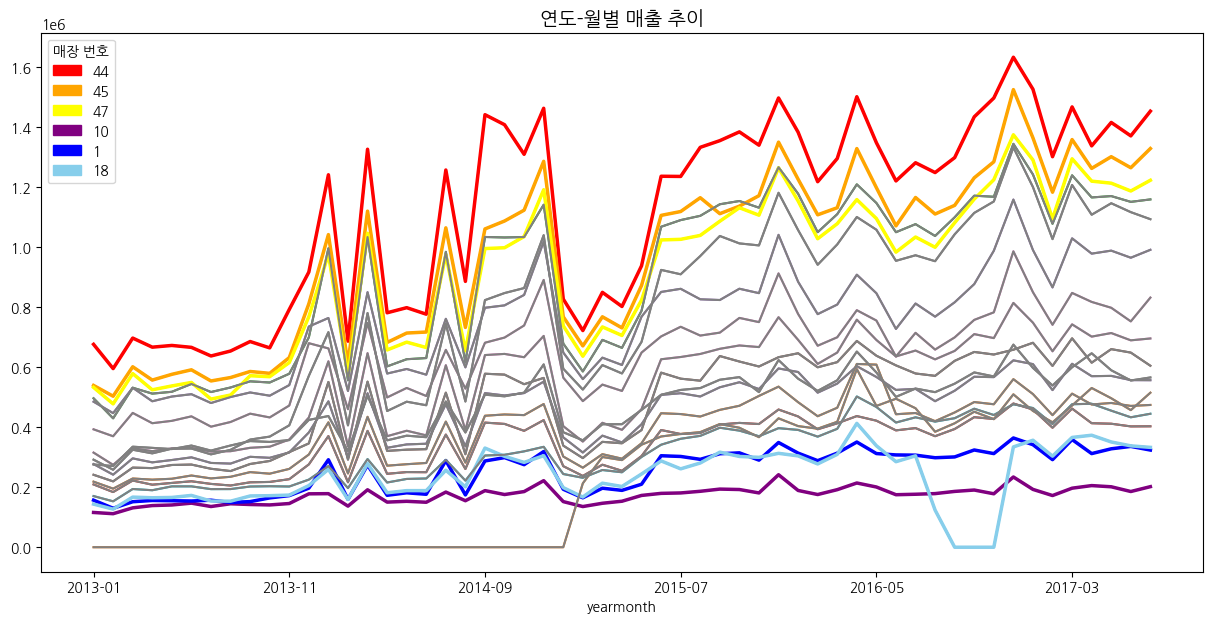

In [ ]:
import matplotlib.patches as mpatches

ax = all_store_sales.plot.line(figsize=(15,7))

# 색상 딕셔너리 생성
colors = {
    44: 'red',
    45: 'orange',
    47: 'yellow',
    10: 'purple',
    1: 'blue',
    18: 'skyblue'
}

# 매출이 높은 3개 매장, 낮은 3개 매장
high3 = [44, 45, 47]
low3 = [10, 1, 18]

# 매출이 높은 3개 매장 그리기
for store in high3:
    ax.plot(all_store_sales.index, all_store_sales[store], color=colors[store], lw=2.5)

# 매출이 낮은 3개 매장 그리기
for store in low3:
    ax.plot(all_store_sales.index, all_store_sales[store], color=colors[store], lw=2.5)

# 나머지 매장 그리기
for col in all_store_sales.columns:
    if col not in high3 and col not in low3:
        ax.plot(all_store_sales.index, all_store_sales[col], color='grey')

# 범례 색상과 라인 색상이 일치하도록 범례 항목 색상 지정
handles = [
    mpatches.Patch(color=colors[store], label=str(store))
    for store in high3 + low3
]
ax.legend(handles=handles, title='매장 번호')
ax.set_title('연도-월별 매출 추이', fontsize=14)
plt.show()

In [ ]:
# 각 매장은 2013년 1월에 비해 2017년 7월이 몇 % 성장했는가?
# 20번 매장은 2015년 2월에 생긴 매장
growth_rate = ((all_store_sales.iloc[-1] / all_store_sales.iloc[0]) - 1) * 100
growth_rate

store_nbr
1     106.507332
2     117.033074
3     133.510797
4      92.623695
6     100.894824
7     150.502260
8     120.617755
9     105.217568
10     74.269182
17    160.955139
18    131.529287
20           inf
44    114.920905
45    146.398193
46    104.353701
47    129.603980
48    111.725200
49    274.643537
dtype: float64

In [ ]:
# 20번 매장은 제외
growth_rate = growth_rate.drop(20)

In [ ]:
# 전체 매장 평균 약 128% 성장했다.
growth_rate_mean = growth_rate.mean()
growth_rate_mean

127.95920164033487

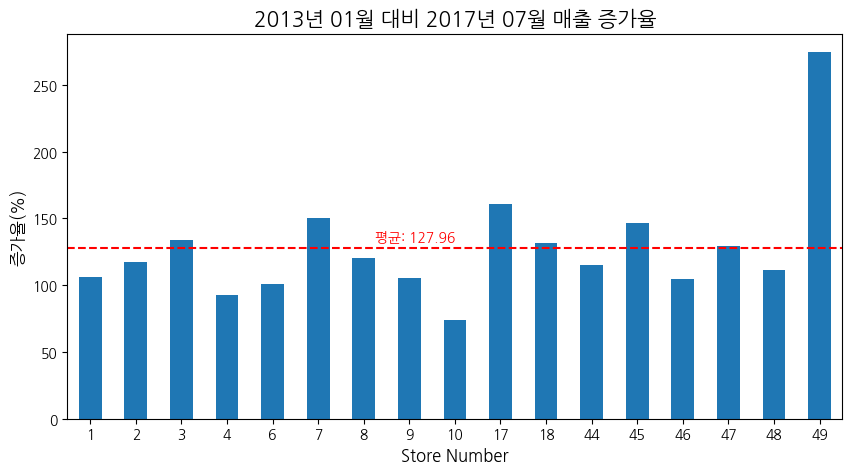

In [ ]:
# 막대그래프 그리기
fig, ax = plt.subplots(figsize=(10, 5))
growth_rate.plot(kind='bar', ax=ax, rot=0)

# 가로선 추가
ax.axhline(growth_rate_mean, color='r', linestyle='--')
ax.text(x=0.5, y=growth_rate_mean+5, s=f'평균: {growth_rate_mean:.2f}', color='r',
        ha='right', transform=ax.get_yaxis_transform())

# 그래프 꾸미기
ax.set_ylabel('증가율(%)', fontsize=12)
ax.set_xlabel('Store Number', fontsize=12)
ax.set_title('2013년 01월 대비 2017년 07월 매출 증가율', fontsize=15)
plt.show()

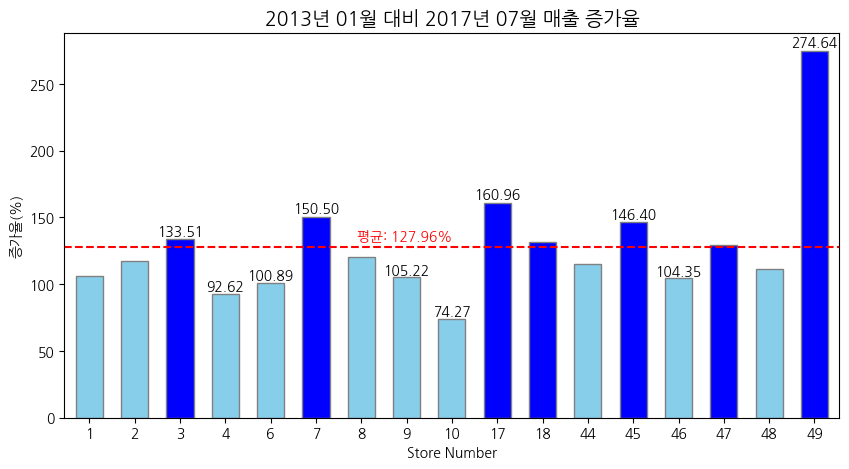

In [ ]:
# 데이터프레임 증가율 값 기준으로 내림차순 정렬
sorted_growth = growth_rate.sort_values(ascending=False)

# 상위 5개와 하위 5개 매출 증가율 선택
top_5 = sorted_growth.iloc[:5]
bottom_5 = sorted_growth.iloc[-5:]

# 상위 5개와 하위 5개 매출 증가율 값의 인덱스 추출
top_5_idx = top_5.index.tolist()
bottom_5_idx = bottom_5.index.tolist()

# 상위 5개와 하위 5개 매출 증가율 값에 대응하는 막대 위치 찾기
top_5_pos = [list(growth_rate.index).index(i) for i in top_5_idx]
bottom_5_pos = [list(growth_rate.index).index(i) for i in bottom_5_idx]

# 막대그래프 그리기
above_mean = growth_rate > growth_rate_mean
colors = ['blue' if i else 'skyblue' for i in above_mean]
fig, ax = plt.subplots(figsize=(10, 5))
growth_rate.plot(kind='bar', ax=ax, rot=0, color=colors, ec='grey', width=0.6)

# 상위 5개와 하위 5개 매출 증가율 값 표시
for i, val in enumerate(top_5):
    ax.text(top_5_pos[i], val+1, f'{val:.2f}', ha='center', va='bottom')
for i, val in enumerate(bottom_5):
    ax.text(bottom_5_pos[i], val+10, f'{val:.2f}', ha='center', va='top')

# 평균선 추가
ax.axhline(growth_rate_mean, color='r', linestyle='--')
ax.text(x=0.5, y=growth_rate_mean+5, s=f'평균: {growth_rate_mean:.2f}%', color='r',
        ha='right', transform=ax.get_yaxis_transform())

# 그래프 꾸미기
ax.set_ylabel('증가율(%)')
ax.set_xlabel('Store Number')
ax.set_title('2013년 01월 대비 2017년 07월 매출 증가율', fontsize=14)
plt.show()


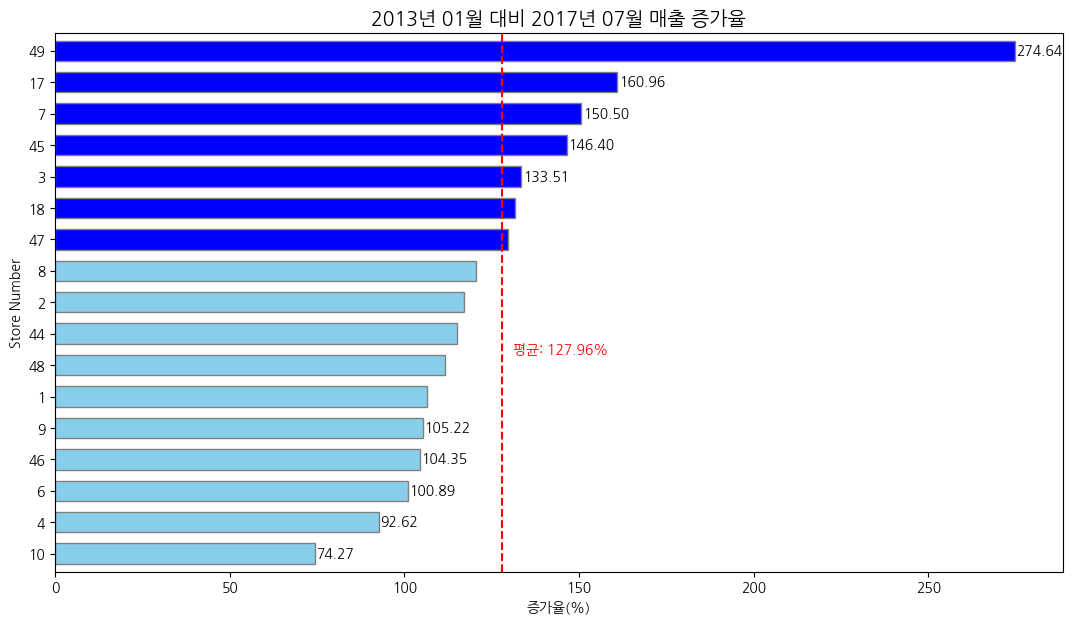

In [ ]:
# 데이터프레임 증가율 값 기준으로 내림차순 정렬
sorted_growth = growth_rate.sort_values(ascending=True)

# 상위 5개와 하위 5개 매출 증가율 선택
top_5 = sorted_growth.tail(5)
bottom_5 = sorted_growth.head(5)

# 상위 5개와 하위 5개 매출 증가율 값의 인덱스 추출
top_5_idx = top_5.index.tolist()
bottom_5_idx = bottom_5.index.tolist()

# 상위 5개와 하위 5개 매출 증가율 값에 대응하는 막대 위치 찾기
top_5_pos = [list(sorted_growth.index).index(i) for i in top_5_idx]
bottom_5_pos = [list(sorted_growth.index).index(i) for i in bottom_5_idx]

# 막대그래프 그리기
colors = ['blue' if val > growth_rate_mean else 'skyblue' for val in sorted_growth.values]

fig, ax = plt.subplots(figsize=(13, 7))
sorted_growth.plot(kind='barh', ax=ax, color=colors, ec='grey', width=0.65)


# 상위 5개와 하위 5개 매출 증가율 값 표시
for i, val in enumerate(top_5):
    ax.text(val+0.5, top_5_pos[i], f'{val:.2f}', ha='left', va='center')
for i, val in enumerate(bottom_5):
    ax.text(val+0.5, bottom_5_pos[i], f'{val:.2f}', ha='left', va='center')

# 평균선 추가
ax.axvline(growth_rate_mean, color='r', linestyle='--')
ax.text(growth_rate_mean+3, 0.4, f'평균: {growth_rate_mean:.2f}%', color='r',
        va='bottom', transform=ax.get_xaxis_transform())

# 그래프 꾸미기
ax.set_xlabel('증가율(%)')
ax.set_ylabel('Store Number')
ax.set_title('2013년 01월 대비 2017년 07월 매출 증가율', fontsize=14)
plt.show()


## A, B, C, D 타입의 판매 TOP 10 제품군 비교
- 각 타입은 어떤 특징이 있을까?
- 다르지 않다고 봐도 무방한 결과

<AxesSubplot: ylabel='family'>

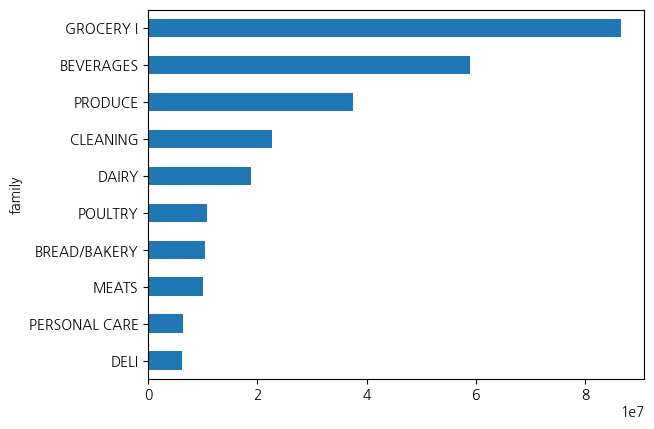

In [ ]:
quito_A.groupby('family')['sales'].sum().nlargest(10).sort_values(ascending=True).plot(kind='barh')

<AxesSubplot: ylabel='family'>

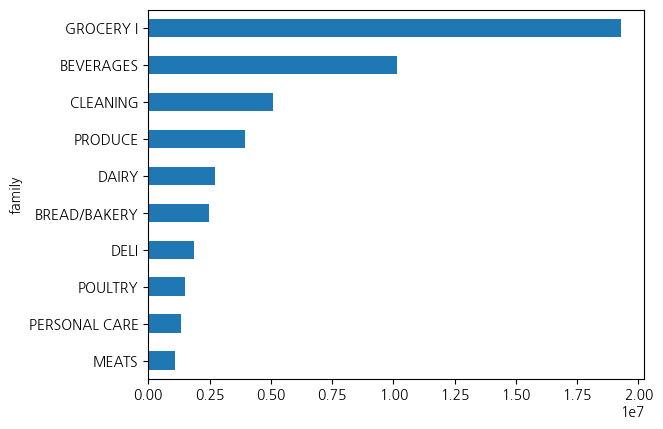

In [ ]:
quito_B.groupby('family')['sales'].sum().nlargest(10).sort_values(ascending=True).plot(kind='barh')

<AxesSubplot: ylabel='family'>

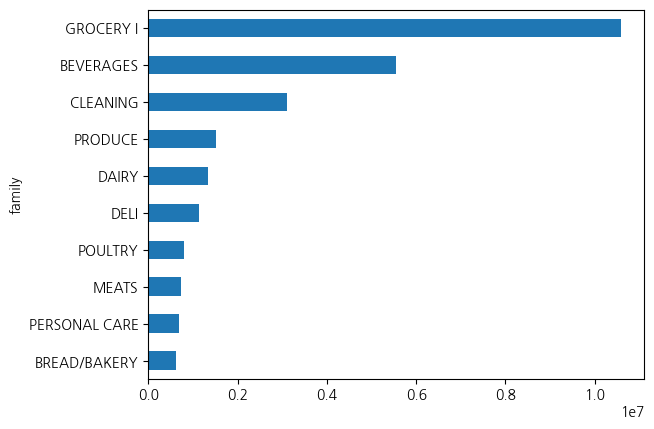

In [ ]:
quito_C.groupby('family')['sales'].sum().nlargest(10).sort_values(ascending=True).plot(kind='barh')

<AxesSubplot: ylabel='family'>

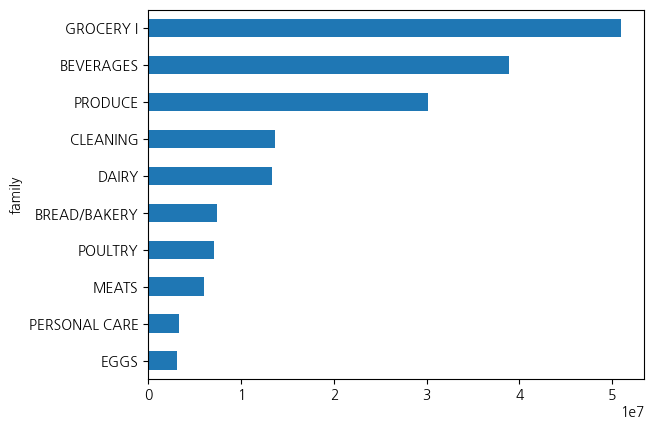

In [ ]:
quito_D.groupby('family')['sales'].sum().nlargest(10).sort_values(ascending=True).plot(kind='barh')

### 매장별 매출과 유가의 상관관계

In [ ]:
daily_sales_oil = pd.pivot_table(df_quito, index='date', columns='store_nbr', values='sales', aggfunc='sum')
daily_sales_oil

store_nbr,1,2,3,4,6,7,8,9,10,17,18,20,44,45,46,47,48,49
date,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,7673.513000,8204.567000,0.000000,30095.181000,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,5523.241000,5107.041000,0.000000,20447.057000,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,5239.568995,4033.748000,0.000000,22795.799000,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,7557.546000,6510.638000,0.000000,31382.508000,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,12458.913000,7695.632000,18494.349000,43330.500000,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,13071.229000,9387.130000,17593.222019,41559.973000,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,15051.575000,10975.753012,22210.995000,45604.445000,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000


In [ ]:
daily_sales_oil['oil'] = df_quito.groupby('date')['dcoilwtico'].mean()

In [ ]:
daily_sales_oil

store_nbr,1,2,3,4,6,7,8,9,10,17,18,20,44,45,46,47,48,49,oil
date,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,7673.513000,8204.567000,0.000000,30095.181000,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,93.14
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,5523.241000,5107.041000,0.000000,20447.057000,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,92.97
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,5239.568995,4033.748000,0.000000,22795.799000,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,93.12
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,7557.546000,6510.638000,0.000000,31382.508000,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,12458.913000,7695.632000,18494.349000,43330.500000,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,48.81
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,13071.229000,9387.130000,17593.222019,41559.973000,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,NaN
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,15051.575000,10975.753012,22210.995000,45604.445000,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,NaN


In [ ]:
# Quito 각 매장 매출과 유가의 상관관계
store_oil_corr = daily_sales_oil.corr().iloc[-1, :-1].to_frame().sort_values('oil', ascending=False)
store_oil_corr

,oil
store_nbr,
18,-0.310941
10,-0.383417
2,-0.453567
48,-0.463939
46,-0.494984
9,-0.527352
44,-0.560461
45,-0.582782
4,-0.600823


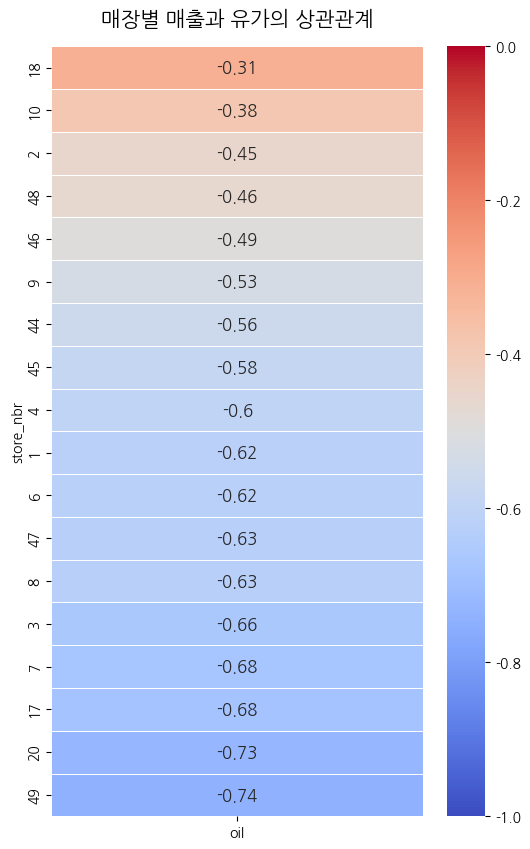

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(store_oil_corr, annot=True,
            vmin=-1, vmax=0,
            cmap='coolwarm',
            annot_kws={"fontsize":12},
            linewidth=0.5)
plt.title('매장별 매출과 유가의 상관관계', pad=15, fontsize=15)
plt.show()

## 유가와 매출의 상관관계를 통해 매장의 입지를 추측
- 유가가 오르면 자연스럽게 자동차 운행에 대한 부담이 증가
- 접근성이 좋지 않은 매장으로의 이동이 꺼려짐
- 평소 방문하던 매장이더라도 후순위로 밀리며 근처 다른 매장으로 발걸음을 옮길 수 있음
### => 유가와 매출의 음의 상관관계가 강할수록 고객의 접근성이 좋지 않은 곳이라고 추측

## 다른 요소 : 고객군, 제품 라인업에 영향을 받음
- 고소득층의 고객은 유가에 크게 상관 없이 소비
- 자동차 관련 제품 매장은 매우 민감하게 소비를 줄이겠지만 식료품, 생필품 위주의 매장은 그래도 가야 함

In [ ]:
df_tran = pd.read_csv('data/transactions.csv')
df_tran

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [ ]:
daily_store_tran = df_tran.groupby(['date', 'store_nbr'])['transactions'].sum()
daily_store_tran

date        store_nbr
2013-01-01  25            770
2013-01-02  1            2111
            2            2358
            3            3487
            4            1922
                         ... 
2017-08-15  50           2804
            51           1573
            52           2255
            53            932
            54            802
Name: transactions, Length: 83488, dtype: int64

In [ ]:
df_tran2 = df_tran[df_tran['store_nbr']==2]
df_tran2

,date,store_nbr,transactions
2,2013-01-02,2,2358
48,2013-01-03,2,2033
94,2013-01-04,2,2066
140,2013-01-05,2,2062
186,2013-01-06,2,1992
...,...,...,...
83219,2017-08-11,2,1698
83273,2017-08-12,2,1613
83327,2017-08-13,2,1658
83381,2017-08-14,2,1788


<AxesSubplot: xlabel='date'>

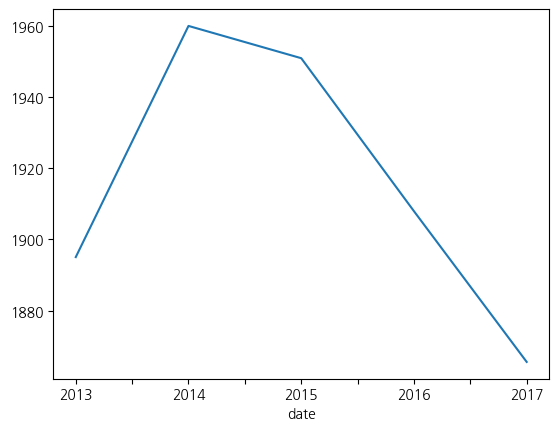

In [ ]:
df_tran2.groupby(df_tran2['date'].map(lambda x:x[:4]))['transactions'].mean().plot()

In [ ]:
# 연도별 transaction 합계
# 크게 상승하지 않고 평이한 모습
df_tran.groupby(df_tran['date'].map(lambda x:x[:4]))['transactions'].sum()

date
2013    29107173
2014    30006929
2015    31312370
2016    31052337
2017    20000136
Name: transactions, dtype: int64

In [ ]:
# 왜 transaction은 크게 오르지 않았는데 sales는 많이 올랐을까?

In [ ]:
df_quito

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Quito,Pichincha,D,13,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2017-08
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2017-08
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2017-08
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2017-08


In [ ]:
date_family_sales = df_quito.groupby(['yearmonth', 'family'])['sales'].mean()
date_family_sales

yearmonth  family                    
2013-01    AUTOMOTIVE                       5.921147
           BABY CARE                        0.000000
           BEAUTY                           4.422939
           BEVERAGES                     1712.046595
           BOOKS                            0.000000
                                            ...     
2017-08    POULTRY                        666.889093
           PREPARED FOODS                 134.120896
           PRODUCE                       3721.374528
           SCHOOL AND OFFICE SUPPLIES     157.625926
           SEAFOOD                         43.264933
Name: sales, Length: 1848, dtype: float64

In [ ]:
date_family_sales_line = date_family_sales.unstack(level=1)
date_family_sales_line

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
yearmonth,,,,,,,,,,,,,,,,,,,,,
2013-01,5.921147,0.000000,4.422939,1712.046595,0.000000,485.691566,0.000000,1275.494624,580.530466,301.102550,...,0.000000,555.030700,277.152330,0.000000,0.000000,351.240292,151.380335,0.000000,0.000000,44.970692
2013-02,7.140873,0.000000,4.329365,1576.037698,0.000000,477.921218,0.000000,1229.313492,599.033730,303.293566,...,0.000000,536.846552,263.059524,0.000000,0.000000,356.961617,157.846022,0.000000,0.000000,46.491696
2013-03,6.874552,0.000000,3.912186,1826.428315,0.000000,528.752802,0.000000,1301.641577,683.184588,321.372002,...,0.000000,546.525122,265.811828,0.000000,0.000000,362.800752,175.176353,4.704301,0.000000,50.264401
2013-04,7.457407,0.000000,3.946296,1793.053704,0.000000,524.373230,0.000000,1271.462963,637.092593,322.143835,...,0.000000,546.491003,285.014815,0.000000,0.000000,355.929268,154.598705,8.048148,0.000000,45.291537
2013-05,8.922939,0.000000,3.738351,1736.224014,0.000000,507.083748,0.000000,1250.792115,639.964158,330.058190,...,0.000000,551.368303,248.618280,0.000000,0.000000,354.110451,159.426450,11.465950,0.000000,47.422661
2013-06,7.909259,0.000000,4.122222,1886.083333,0.000000,514.220231,0.000000,1318.322222,661.924074,331.387700,...,0.000000,574.821746,249.270370,0.000000,0.000000,383.248661,163.123563,11.322222,0.000000,38.208291
2013-07,7.752688,0.000000,5.301075,1594.207885,0.000000,452.577735,0.000000,1198.191756,618.191756,282.427805,...,0.000000,538.349912,243.333333,0.000000,0.000000,354.649833,155.706183,8.924731,0.000000,39.834211
2013-08,7.629032,0.000000,5.093190,1631.915771,0.000000,459.688348,0.000000,1230.645161,609.347670,305.382620,...,0.000000,539.701401,253.182796,0.000000,0.000000,364.589487,154.923482,9.827957,0.000000,39.410274
2013-09,6.825926,0.000000,3.883333,1931.777778,0.000000,553.145561,0.000000,1289.853704,658.987037,349.936396,...,0.000000,576.372957,266.662963,0.000000,0.000000,387.680483,159.444228,8.540741,0.000000,44.576926


In [ ]:
top10_family = df_quito.groupby('family')['sales'].sum().nlargest(10).index
top10_family

Index(['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY',
       'BREAD/BAKERY', 'POULTRY', 'MEATS', 'DELI', 'PERSONAL CARE'],
      dtype='object', name='family')

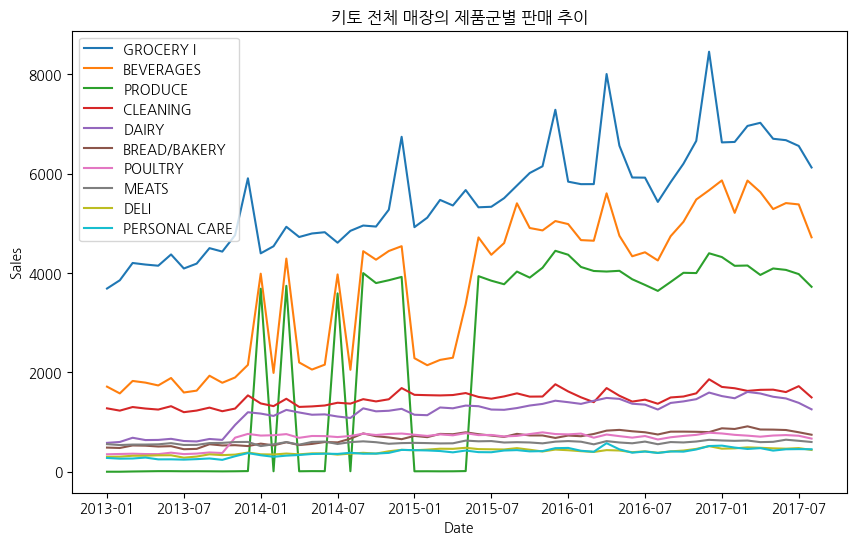

In [ ]:
# 라인그래프 그리기
plt.figure(figsize=(10,6))
for family in top10_family:
    plt.plot(date_family_sales_line.index, date_family_sales_line[family], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('키토 전체 매장의 제품군별 판매 추이')
plt.xticks(['2013-01', '2013-07',
            '2014-01', '2014-07',
            '2015-01', '2015-07',
            '2016-01', '2016-07',
            '2017-01', '2017-07'])
plt.legend()
plt.show()

In [ ]:
df_quito[df_quito['store_nbr']==10]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,yearmonth
33,33,2013-01-01,10,AUTOMOTIVE,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
34,34,2013-01-01,10,BABY CARE,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
35,35,2013-01-01,10,BEAUTY,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
36,36,2013-01-01,10,BEVERAGES,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
37,37,2013-01-01,10,BOOKS,0.000,0,NaN,Quito,Pichincha,C,15,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2999167,2999167,2017-08-15,10,POULTRY,102.077,0,47.57,Quito,Pichincha,C,15,2017-08
2999168,2999168,2017-08-15,10,PREPARED FOODS,26.000,0,47.57,Quito,Pichincha,C,15,2017-08
2999169,2999169,2017-08-15,10,PRODUCE,256.911,62,47.57,Quito,Pichincha,C,15,2017-08
2999170,2999170,2017-08-15,10,SCHOOL AND OFFICE SUPPLIES,18.000,3,47.57,Quito,Pichincha,C,15,2017-08


In [ ]:
date_family_sales10 = df_quito[df_quito['store_nbr']==10].groupby(['yearmonth', 'family'])['sales'].mean()
date_family_sales10

yearmonth  family                    
2013-01    AUTOMOTIVE                      1.774194
           BABY CARE                       0.000000
           BEAUTY                          1.580645
           BEVERAGES                     417.677419
           BOOKS                           0.000000
                                            ...    
2017-08    POULTRY                       149.558933
           PREPARED FOODS                 29.933333
           PRODUCE                       264.548867
           SCHOOL AND OFFICE SUPPLIES      2.600000
           SEAFOOD                         1.733333
Name: sales, Length: 1848, dtype: float64

In [ ]:
date_family_sales_line10 = date_family_sales10.unstack(level=1)
date_family_sales_line10

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
yearmonth,,,,,,,,,,,,,,,,,,,,,
2013-01,1.774194,0.000000,1.580645,417.677419,0.0,108.387097,0.000000,721.322581,79.193548,170.129032,...,0.000000,212.768775,149.419355,0.000000,0.000000,103.560517,10.967742,0.000000,0.000000,4.096774
2013-02,3.250000,0.000000,1.178571,378.071429,0.0,103.892857,0.000000,713.535714,84.571429,180.178571,...,0.000000,213.847036,142.357143,0.000000,0.000000,109.169608,11.678571,0.000000,0.000000,3.357143
2013-03,2.580645,0.000000,1.000000,430.032258,0.0,123.322581,0.000000,729.741935,89.870968,193.806452,...,0.000000,214.859838,150.129032,0.000000,0.000000,108.011354,14.322581,0.000000,0.000000,4.032258
2013-04,3.266667,0.000000,1.666667,478.900000,0.0,123.466667,0.000000,802.633333,92.200000,211.833333,...,0.000000,228.283267,169.733333,0.000000,0.000000,117.020534,12.033333,0.000000,0.000000,4.666667
2013-05,2.935484,0.000000,1.354839,485.935484,0.0,122.258065,0.000000,787.322581,88.935484,233.903226,...,0.000000,225.066098,162.967742,0.000000,0.000000,108.686161,11.483871,0.000000,0.000000,2.193548
2013-06,2.766667,0.000000,1.000000,581.866667,0.0,122.166667,0.000000,828.500000,88.500000,229.033333,...,0.000000,246.586832,174.266667,0.000000,0.000000,123.729000,11.600000,0.000000,0.000000,1.766667
2013-07,2.741935,0.000000,1.225806,478.322581,0.0,96.193548,0.000000,741.645161,81.290323,149.354839,...,0.000000,247.105451,159.774194,0.000000,0.000000,118.529613,9.741935,0.000000,0.000000,0.903226
2013-08,3.193548,0.000000,2.032258,563.870968,0.0,93.451613,0.000000,775.258065,78.903226,181.032258,...,0.000000,252.913581,155.129032,0.000000,0.000000,130.713839,12.193548,0.000000,0.000000,0.000000
2013-09,3.500000,0.000000,1.566667,543.133333,0.0,132.700000,0.000000,787.800000,79.100000,207.700000,...,0.000000,241.580967,157.266667,0.000000,0.000000,136.895734,12.300000,0.000000,0.000000,0.333333


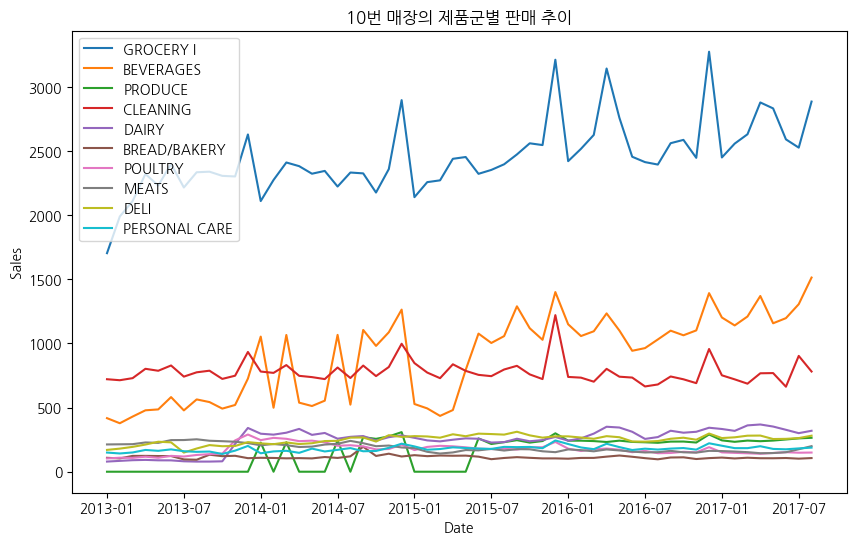

In [ ]:
# 라인그래프 그리기
plt.figure(figsize=(10,6))
for family in top10_family:
    plt.plot(date_family_sales_line10.index, date_family_sales_line10[family], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('10번 매장의 제품군별 판매 추이')
plt.xticks(['2013-01', '2013-07',
            '2014-01', '2014-07',
            '2015-01', '2015-07',
            '2016-01', '2016-07',
            '2017-01', '2017-07'])
plt.legend()
plt.show()

## 키토 매장의 거래량(transaction) 변화 확인

In [ ]:
df_tran

,date,store_nbr,transactions,year,month,yearmonth
0,2013-01-01,25,770,2013,1,2013-01
1,2013-01-02,1,2111,2013,1,2013-01
2,2013-01-02,2,2358,2013,1,2013-01
3,2013-01-02,3,3487,2013,1,2013-01
4,2013-01-02,4,1922,2013,1,2013-01
...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,2017-08
83484,2017-08-15,51,1573,2017,8,2017-08
83485,2017-08-15,52,2255,2017,8,2017-08
83486,2017-08-15,53,932,2017,8,2017-08


In [ ]:
df_tran['yearmonth'] = df_tran['date'].map(lambda x:x[:7])

In [ ]:
tmp1049 = df_tran[df_tran['store_nbr'].isin([10, 44])]
tmp1049

,date,store_nbr,transactions,year,month,yearmonth
10,2013-01-02,10,1293,2013,1,2013-01
38,2013-01-02,44,4821,2013,1,2013-01
56,2013-01-03,10,1157,2013,1,2013-01
84,2013-01-03,44,3618,2013,1,2013-01
102,2013-01-04,10,970,2013,1,2013-01
...,...,...,...,...,...,...
83369,2017-08-13,44,4392,2017,8,2017-08
83389,2017-08-14,10,875,2017,8,2017-08
83423,2017-08-14,44,4039,2017,8,2017-08
83443,2017-08-15,10,1010,2017,8,2017-08


<AxesSubplot: xlabel='yearmonth'>

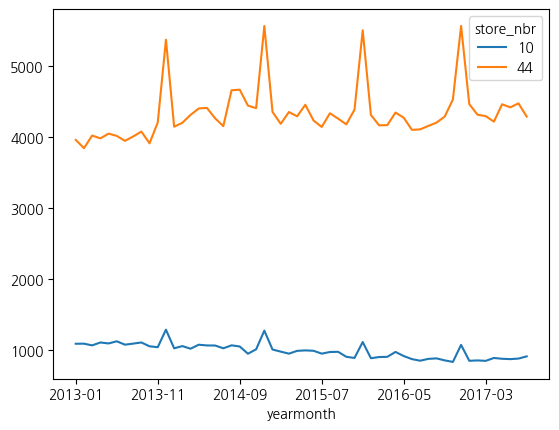

In [ ]:
tmp1049.groupby(['store_nbr', 'yearmonth'])['transactions'].mean().unstack(1).T.plot()